<a href="https://colab.research.google.com/github/yamil-abraham/facial-emotion-detection/blob/main/facial_emotion_detection_100epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Train a deep learning model using FER-2013 dataset on facial emotion detection

# Dataset from : https://www.kaggle.com/datasets/msambare/fer2013

In [16]:
import os

base_path = r'C:\Users\LENOVO P52\Desktop\sentiment-detection\facial-emotion-detection'
print(os.listdir(base_path))


['.git', 'archive.zip', 'dataset', 'emotion', 'emotion_detection_model_100epochs.h5', 'facial_emotion_detection.ipynb', 'facial_emotion_detection_100epochs.ipynb', 'images', 'README.md', 'requirements.txt', 'test', 'train']


In [17]:
import sys
print(sys.executable)


c:\Users\LENOVO P52\AppData\Local\Programs\Python\Python311\python.exe


In [18]:
import sys
!{sys.executable} -m pip install scipy

'c:\Users\LENOVO' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
import zipfile
import os

# Chemins
zip_path = r"C:\Users\LENOVO P52\Desktop\sentiment-detection\facial-emotion-detection\archive.zip"
extract_path = r"C:\Users\LENOVO P52\Desktop\sentiment-detection\facial-emotion-detection"

# Décompresser le fichier
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extraction terminée dans : {extract_path}")

Extraction terminée dans : C:\Users\LENOVO P52\Desktop\sentiment-detection\facial-emotion-detection


In [ ]:
# Delete zip file
#import os
#os.remove(r"C:\Users\LENOVO P52\Desktop\sentiment-detection\facial-emotion-detection\archive.zip")

In [22]:
import zipfile
import os
import shutil

# Chemins
zip_path = r"C:\Users\LENOVO P52\Desktop\sentiment-detection\facial-emotion-detection\archive.zip"
base_path = r"C:\Users\LENOVO P52\Desktop\sentiment-detection\facial-emotion-detection"
extract_path = base_path  # Extraction dans le même dossier

# 1. Décompresser le fichier
print("Extraction du fichier zip...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction terminée !")

# 2. Créer le répertoire dataset
dataset_path = os.path.join(base_path, 'dataset')
os.makedirs(dataset_path, exist_ok=True)
print(f"Dossier 'dataset' créé : {dataset_path}")

# 3. Copier le dossier FER-2013 (ajustez le nom si différent après extraction)
source_fer = os.path.join(base_path, 'FER-2013')  # ou 'train', 'test', selon le contenu du zip
destination_fer = os.path.join(dataset_path, 'FER-2013')

if os.path.exists(source_fer):
    shutil.copytree(source_fer, destination_fer, dirs_exist_ok=True)
    print(f"Dossier copié : {source_fer} → {destination_fer}")
else:
    print(f"Attention : Le dossier {source_fer} n'existe pas")
    print(f"Contenu extrait : {os.listdir(base_path)}")

Extraction du fichier zip...
Extraction terminée !
Dossier 'dataset' créé : C:\Users\LENOVO P52\Desktop\sentiment-detection\facial-emotion-detection\dataset
Attention : Le dossier C:\Users\LENOVO P52\Desktop\sentiment-detection\facial-emotion-detection\FER-2013 n'existe pas
Contenu extrait : ['.git', 'archive.zip', 'dataset', 'emotion', 'emotion_detection_model_100epochs.h5', 'facial_emotion_detection.ipynb', 'facial_emotion_detection_100epochs.ipynb', 'images', 'README.md', 'requirements.txt', 'test', 'train']


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


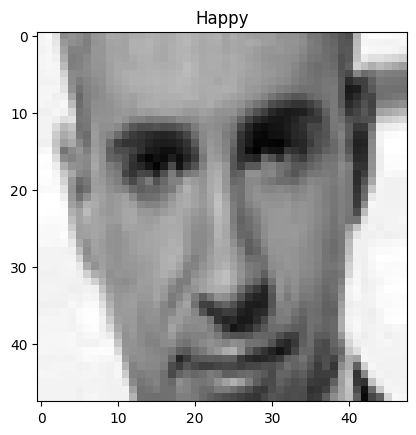

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

None
Images d'entraînement: 28709
Images de test: 7178
Epoch 1/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 101s 110ms/step - accuracy: 0.2746 - loss: 1.7632 - val_accuracy: 0.3488 - val_loss: 1.6569
Epoch 2/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2500 - loss: 1.6920 - val_accuracy: 0.3502 - val_loss: 1.6569
Epoch 3/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 94s 105ms/step - accuracy: 0.3495 - loss: 1.6408 - val_accuracy: 0.4348 - val_loss: 1.4618
Epoch 4/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3750 - loss: 1.6928 - val_accuracy: 0.4358 - val_loss: 1.4563
Epoch 5/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 98s 110ms/step - accuracy: 0.4163 - loss: 1.5016 - val_accuracy: 0.4964 - val_loss: 1.3133
Epoch 6/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3750 - loss: 1.5254 - val_accuracy: 0.4960 - val_loss: 1.3142
Epoch 7/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 105s 117ms/step - accuracy: 0.4556 - loss: 1.4150 - val_accuracy: 0.5080 - val_loss: 1.2717
Epoch 8/100
897/897 ━━━━━━━━

In [ ]:
# Data augmentation | Create dataset generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

IMG_HEIGHT = 48
IMG_WIDTH = 48
batch_size = 32

# Chemins adaptés pour Windows
train_data_dir = 'C:/Users/LENOVO P52/Desktop/sentiment-detection/facial-emotion-detection/dataset/train'
validation_data_dir = 'C:/Users/LENOVO P52/Desktop/sentiment-detection/facial-emotion-detection/dataset/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode='grayscale',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

# Verify the generator by plotting a few faces and printing corresponding labels
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
img, label = train_generator.__next__()
import random
i = random.randint(0, (img.shape[0])-1)
image = img[i]
l = class_labels[label[i].argmax()]
plt.imshow(image[:, :, 0], cmap='gray')
plt.title(l)
plt.show()

##########################################################
###########################################################
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display summary
print(model.summary())

# Compter les images (CORRECTION ICI)
num_train_imgs = 0
for root, dirs, files in os.walk(train_data_dir):  # ← Changé de train_path à train_data_dir
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(validation_data_dir):  # ← Changé de test_path à validation_data_dir
    num_test_imgs += len(files)

print(f"Images d'entraînement: {num_train_imgs}")
print(f"Images de test: {num_test_imgs}")

epochs = 100

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_imgs//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_test_imgs//batch_size)

# Sauvegarder le modèle après l'entraînement
model.save('emotion_detection_model_100epochs.h5')
print("Modèle sauvegardé avec succès!")

In [24]:
# Save the trained model
model.save('emotion_detection_model_100epochs.h5')

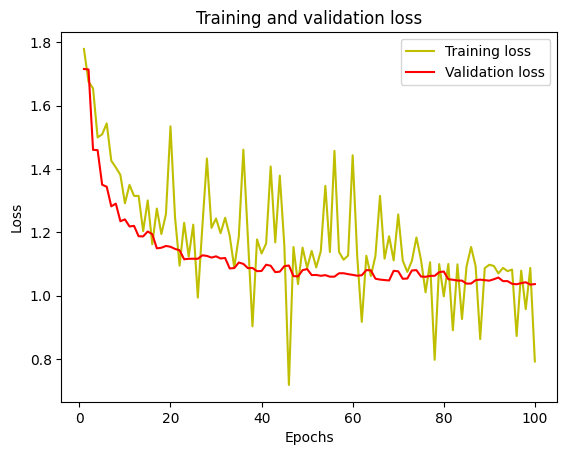

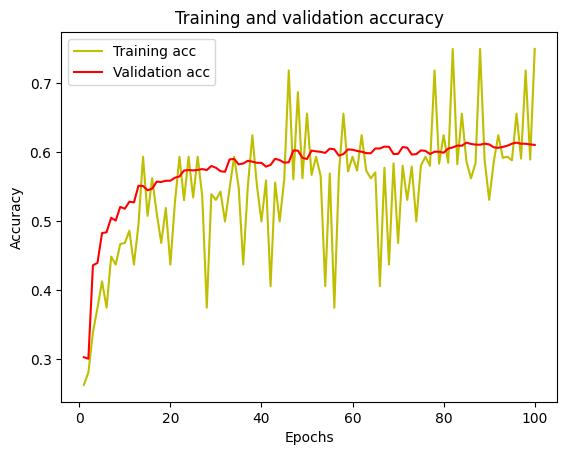

In [ ]:
# Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import os

# Vérifier le répertoire actuel
print("Répertoire actuel:", os.getcwd())
print("\n" + "="*50)

# Lister le contenu du répertoire actuel
print("Contenu du répertoire actuel:")
for item in os.listdir('.'):
    print(f"  - {item}")

# Vérifier si le dossier existe
chemins_possibles = [
    'dataset/test',
    './dataset/test',
    'facial-emotion-detection/dataset/test',
    '../dataset/test'
]

print("\n" + "="*50)
print("Vérification des chemins possibles:")
for chemin in chemins_possibles:
    existe = os.path.exists(chemin)
    print(f"  {chemin}: {'EXISTE' if existe else 'N existe pas'}")

Répertoire actuel: c:\Users\LENOVO P52\Desktop\sentiment-detection\facial-emotion-detection

Contenu du répertoire actuel:
  - .git
  - archive.zip
  - dataset
  - emotion
  - emotion_detection_model_100epochs.h5
  - facial_emotion_detection.ipynb
  - facial_emotion_detection_100epochs.ipynb
  - images
  - README.md
  - requirements.txt

Vérification des chemins possibles:
  dataset/test: EXISTE
  ./dataset/test: EXISTE
  facial-emotion-detection/dataset/test: N existe pas
  ../dataset/test: N existe pas


Found 7178 images belonging to 7 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Accuracy =  0.53125


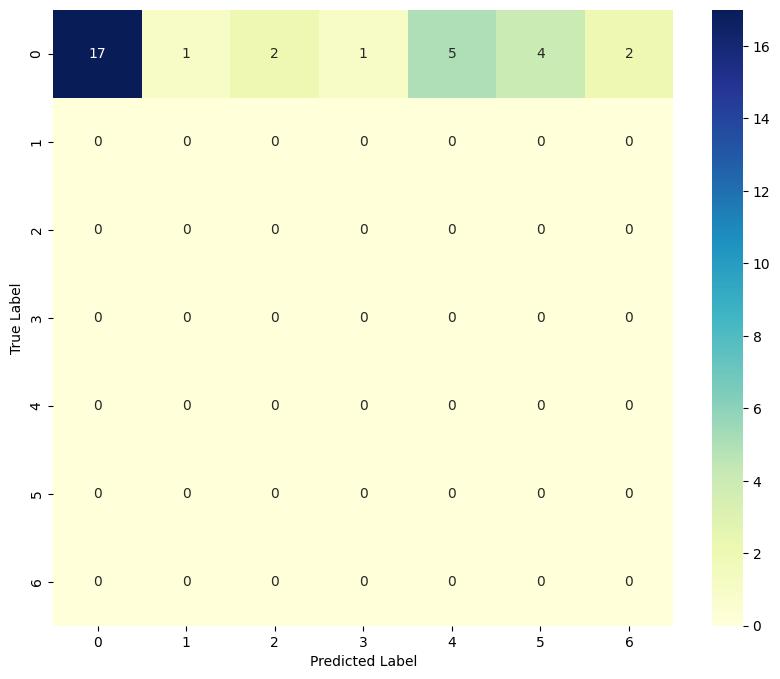

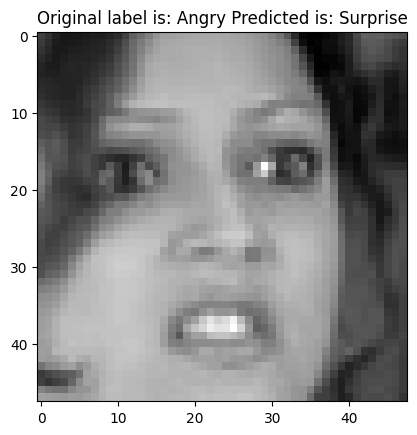

In [ ]:
####################################################################
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random

# Charger le modèle
my_model = load_model('emotion_detection_model_100epochs.h5', compile=False)

# Créer le générateur de validation
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
   './dataset/test',  # ← Chemin corrigé
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

# Générer un batch d'images
test_img, test_label = validation_generator.__next__()
predictions = my_model.predict(test_img)
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_label, axis=1)

# Calculer l'accuracy
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

# Matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Labels des classes
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Vérifier les résultats sur quelques images
n = random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_label = class_labels[test_labels[n]]
pred_label = class_labels[predictions[n]]

plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is: " + orig_label + " Predicted is: " + pred_label)
plt.show()

In [ ]:
import sys
! "{sys.executable}" -m pip install scikit-learn


  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------------

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\LENOVO P52\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\LENOVO P52\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO P52\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO P52\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO P52\AppData\Local\Programs\Python\Python311\Lib\http\client.py", line 473, in 

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# --- CETTE PARTIE EST LA SOLUTION ---
# On indique explicitement à Python où se trouve le moteur de dessin
# Note : le 'r' devant les guillemets est important pour Windows
graphviz_path = r'C:\Program Files\Graphviz\bin'
os.environ["PATH"] += os.pathsep + graphviz_path
# -------------------------------------

try:
    # 1. Générer le schéma
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    
    # 2. Vérifier et afficher
    if os.path.exists('model_plot.png'):
        model_img = plt.imread('model_plot.png')
        plt.figure(figsize=(15, 10)) 
        plt.imshow(model_img)
        plt.axis('off')
        plt.show()
    else:
        print("Erreur : Le fichier n'a pas été créé. Vérifiez que le chemin C:\\Program Files\\Graphviz\\bin est correct sur votre PC.")
        
except ImportError:
    print("Erreur : Les bibliothèques pydot ou pydotplus sont manquantes.")
except Exception as e:
    print(f"Une erreur inattendue est survenue : {e}")

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
Erreur : Le fichier 'model_plot.png' n'a pas pu être généré. Vérifiez l'installation de Graphviz.


In [ ]:
import os
print(os.getcwd())


c:\Users\LENOVO P52\Desktop\sentiment-detection\facial-emotion-detection


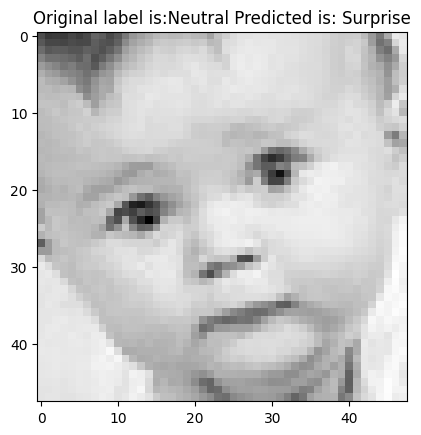

In [ ]:
# Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_label = class_labels[test_labels[n]]
pred_label = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_label+" Predicted is: "+ pred_label)
plt.show()